In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
india_stations_df = pd.read_pickle('../2015-2020-pm25/india_stations.pkl')
india_stations_pm25_list = pd.read_pickle('../2015-2020-pm25/india_stations_pm25.pkl')

In [3]:
import configparser

config = configparser.ConfigParser()
config.read("./config.ini")

city = "Kolkata"

START = config['period']['start_date']
END   = config['period']['end_date']

In [4]:
city_station_ids = india_stations_df[india_stations_df['City'] == city]['StationId'].values

In [5]:
city_stations_pm25_list = []

for df in india_stations_pm25_list:
    if df['StationId'].values[0] in city_station_ids:
        city_stations_pm25_list.append(df)

In [6]:
india_stations_df

,StationName,StationId,City,Latitude,Longitude
0,"Secretariat, Amaravati - APPCB",AP001,Amaravati,16.504561,80.523517
1,"GVM Corporation, Visakhapatnam - APPCB",AP005,Visakhapatnam,17.748887,83.247789
2,"Railway Colony, Guwahati - APCB",AS001,Guwahati,26.179587,91.784315
3,"DRM Office Danapur, Patna - BSPCB",BR005,Patna,25.585624,85.044299
4,"Govt. High School Shikarpur, Patna - BSPCB",BR006,Patna,25.587980,85.094986
...,...,...,...,...,...
122,"Fort William, Kolkata - WBPCB",WB009,Kolkata,22.554246,88.335874
123,"Jadavpur, Kolkata - WBPCB",WB010,Kolkata,22.495500,88.370900
124,"Rabindra Bharati University, Kolkata - WBPCB",WB011,Kolkata,22.584454,88.359384
125,"Rabindra Sarobar, Kolkata - WBPCB",WB012,Kolkata,22.512145,88.363695


In [7]:
# idx = np.random.randint(len(city_stations_pm25_list))
idx = 4
station_df = city_stations_pm25_list[idx][:END]

In [8]:
station_id = station_df['StationId'].values[0]
station_data = india_stations_df[india_stations_df['StationId'] == station_id].values[0]

station_df['Place'] = station_data[0]
station_df['City'] = station_data[1]
station_df['Latitude'] = station_data[3]
station_df['Longitude'] = station_data[4]

<ipython-input-8-ae0d2c0a6eee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df['Place'] = station_data[0]
<ipython-input-8-ae0d2c0a6eee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df['City'] = station_data[1]
<ipython-input-8-ae0d2c0a6eee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [9]:
station_df.head()

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2018-11-06,WB011,167.86,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-07,WB011,271.21,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-08,WB011,238.12,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-09,WB011,222.31,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-10,WB011,197.68,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384


In [10]:
station_df.tail()

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2020-03-11,WB011,63.98,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2020-03-12,WB011,71.99,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2020-03-13,WB011,70.70,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2020-03-14,WB011,55.44,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2020-03-15,WB011,22.47,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384


In [11]:
def plot_ts(df, name, columns=['PM2.5']):
    fig = plt.figure(figsize=(18, 4))
    df[columns].plot(c='k', ax=fig.gca())
    plt.title(name)
    plt.ylabel('PM2.5')
    plt.grid(ls='--')
    plt.show()

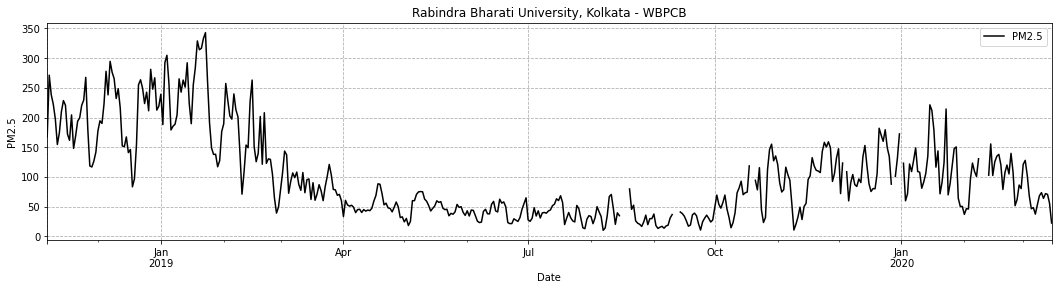

In [12]:
plot_ts(station_df, station_data[0])

In [13]:
station_df[station_df['PM2.5'].isnull()]

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2019-08-16,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-08-17,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-08-18,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-08-19,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-09-11,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-09-12,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-09-13,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-10-19,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-10-20,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384


In [14]:
def previous_window_impute(station_df, window_length=7):
    column = "PM2.5"
    try:
        for idx, value in enumerate(station_df[column].values):
            if np.isnan(value):
                station_df[column][idx] = station_df[column][idx - window_length]
    except:
        pass
    return station_df

In [15]:
station_df = previous_window_impute(station_df)

<ipython-input-14-c3269d34fd44>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df[column][idx] = station_df[column][idx - window_length]
<ipython-input-15-cc740762f2d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df = previous_window_impute(station_df)


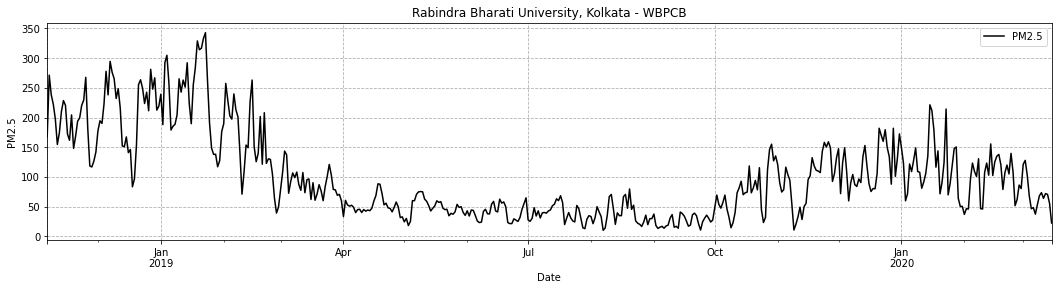

In [16]:
plot_ts(station_df, station_data[0])

In [17]:
station_df.index.freq = 'D'
station_df.head()

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2018-11-06,WB011,167.86,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-07,WB011,271.21,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-08,WB011,238.12,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-09,WB011,222.31,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-10,WB011,197.68,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384


In [18]:
station_pm25_df = pd.DataFrame(station_df['PM2.5'])

In [19]:
station_pm25_df.head()

,PM2.5
Date,
2018-11-06,167.86
2018-11-07,271.21
2018-11-08,238.12
2018-11-09,222.31
2018-11-10,197.68


In [20]:
reframed_df = station_pm25_df
ratio = 0.3

length = len(reframed_df)
limit = (int)(ratio * length)

training_set, test_set = reframed_df.values[:-limit], reframed_df.values[-limit:]
test_idx_values = reframed_df.index.to_pydatetime()[-limit:]
days = len(test_idx_values)

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing


import warnings
warnings.filterwarnings('ignore')

In [22]:
def get_AR_model(training_set, test_set):
    
    predictions = np.array([])

    for i in range(0, days):
        model = AutoReg(training_set, lags=5)
        model_fit = model.fit()        
        prediction = model_fit.predict(start=len(training_set), end=len(training_set))
        predictions = np.append(predictions, prediction)
        training_set = np.append(training_set, test_set[i])
        
    score = {
        "r2_score": r2_score(test_set, predictions),
        "mae": mean_absolute_error(test_set, predictions), 
        "rmse": np.sqrt(mean_squared_error(test_set, predictions)),
        "mean": np.mean(test_set)
    }

    return model, score, None, predictions 

def get_ARIMA_model(training_set, test_set):
    
    predictions = np.array([])

    for i in range(0, days):
        model = SARIMAX(training_set)
        model_fit = model.fit()        
        prediction = model_fit.predict(start=len(training_set), end=len(training_set))
        predictions = np.append(predictions, prediction)
        training_set = np.append(training_set, test_set[i])
        
    score = {
        "r2_score": r2_score(test_set, predictions),
        "mae": mean_absolute_error(test_set, predictions), 
        "rmse": np.sqrt(mean_squared_error(test_set, predictions)),
        "mean": np.mean(test_set)
    }

    return model, score, None, predictions 

def get_HoltWinters_model(training_set, test_set):       
    
    t,d,s,p,b,r = 'add', False, 'mul', 7, False, False
    predictions = np.array([])

    for i in range(0, days):
        model = ExponentialSmoothing(training_set, trend=t, damped=d, seasonal=s, seasonal_periods=p)
        model_fit = model.fit(optimized=True, use_boxcox=b, remove_bias=r)        
        prediction = model_fit.predict(start=len(training_set), end=len(training_set))
        predictions = np.append(predictions, prediction)
        training_set = np.append(training_set, test_set[i])
        
    score = {
        "r2_score": r2_score(test_set, predictions),
        "mae": mean_absolute_error(test_set, predictions), 
        "rmse": np.sqrt(mean_squared_error(test_set, predictions)),
        "mean": np.mean(test_set)
    }

    return model, score, None, predictions

In [23]:
MODEL_LIST = [
    ('AR', get_AR_model),
    ('ARIMA', get_ARIMA_model),
    ('Holt-Winters', get_HoltWinters_model)
]

In [24]:
best = {}
best_score = 9e9

rows = []

predictions = {}
predictions['Actual'] = test_set.reshape(-1)

for name, model_fn in MODEL_LIST:
    regressor, score, scaler, preds = model_fn(training_set, test_set)
    row = [f"{name} Regression", score['mae'], score['rmse'], score['r2_score'], score['mean']]
    rows.append(row)
    
    predictions[name + " Regression"] = preds.reshape(-1)
    
    if score['rmse'] < best_score:
        best['station_name'] = station_data[0]
        best['name'] = name + " Regression"
        best['regressor'] = regressor
        best['scaler'] = scaler
        best['score'] = score      
        best['test_set_predictions'] = preds
        
        best_score = score['rmse']

model_dfs = pd.DataFrame(rows, columns=["model", "mae", "rmse", "r2_score", "mean"])
model_dfs

,model,mae,rmse,r2_score,mean
0,AR Regression,25.550452,34.386828,0.316960,102.808378
1,ARIMA Regression,26.731792,35.433787,0.274735,102.808378
2,Holt-Winters Regression,29.318529,38.952640,0.123533,102.808378


In [25]:
print("Best Model: ", best['name'])
print("Score: ", best['score'])

Best Model:  AR Regression
Score:  {'r2_score': 0.3169603177993078, 'mae': 25.550451571491145, 'rmse': 34.3868275201114, 'mean': 102.80837837837838}


In [26]:
import datetime

test_idx_values += datetime.timedelta(days=1)

In [27]:
predictions_df = pd.DataFrame(predictions, index=test_idx_values)

In [28]:
predictions_df

,Actual,AR Regression,ARIMA Regression,Holt-Winters Regression
2019-10-21,81.52,73.749065,71.596830,86.822152
2019-10-22,94.32,76.422725,79.624688,74.234226
2019-10-23,78.31,95.285290,92.145075,73.748913
2019-10-24,115.61,82.454344,76.488874,76.148096
2019-10-25,44.62,109.899875,112.975252,110.443766
...,...,...,...,...
2020-03-12,63.98,71.284825,71.373259,73.846875
2020-03-13,71.99,62.590390,62.048623,66.780088
2020-03-14,70.70,71.530819,69.822781,69.609212
2020-03-15,55.44,72.438283,68.572440,71.185794


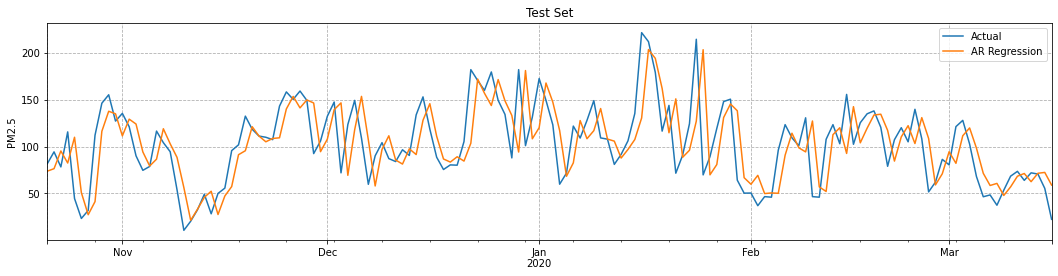

In [29]:
fig = plt.figure(figsize=(18, 4))
predictions_df[['Actual', best['name']]].plot(ax=fig.gca())
plt.title("Test Set")
plt.ylabel('PM2.5')
plt.grid(ls='--')

In [30]:
import pickle

with open("best_pm25_reg_model_statistical.pkl", "wb") as file:
    pickle.dump(best, file, protocol=4)